In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import thinkstats2
import thinkplot
import matplotlib
import pandas as pd

In [2]:
df = pd.read_csv('Salaries.csv')

In [3]:
NL= df.salary[df.lgID == "NL"].dropna()
AL= df.salary[df.lgID == "AL"].dropna()

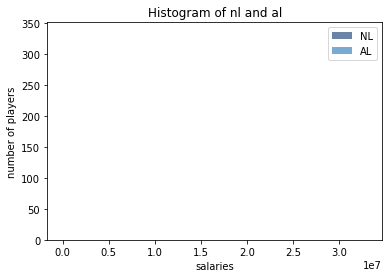

In [44]:
hist_NL_1 = thinkstats2.Hist(NL,label="NL")
hist_AL_1 = thinkstats2.Hist(AL,label="AL")
thinkplot.Hist(hist_NL_1)
thinkplot.Hist(hist_AL_1)
thinkplot.Show(xlabel = 'salaries',ylabel='number of players',title='Histogram of nl and al')

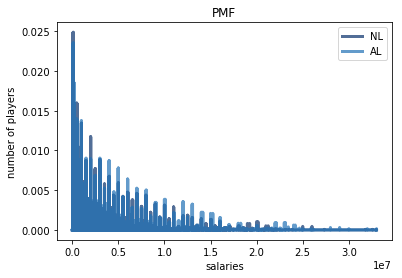

In [5]:
pmf_NL_1 = thinkstats2.Pmf(NL,label="NL")
pmf_AL_1 = thinkstats2.Pmf(AL,label="AL")
thinkplot.Pmf(pmf_NL_1)
thinkplot.Pmf(pmf_AL_1)
thinkplot.Show(xlabel = 'salaries',ylabel='number of players',title='PMF')

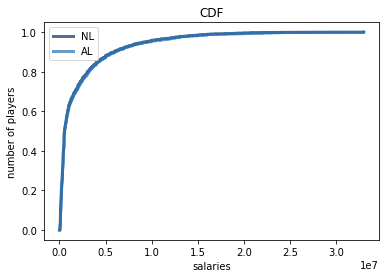

In [43]:
cdf_NL_1 = thinkstats2.Cdf(NL,label="NL")
cdf_AL_1 = thinkstats2.Cdf(AL,label="AL")
thinkplot.Cdf(cdf_NL_1)
thinkplot.Cdf(cdf_AL_1)
thinkplot.Show(xlabel = 'salaries',ylabel='number of players',title='CDF')

In [7]:
print ("means of the NL is %.2f" %NL.mean())
print ("standart deviation of the NL is %.2f" %NL.std())
print ("minumum value of the NL is %.2f" %NL.min())
print ("maximum of the NL is %.2f" %NL.max())
print ("variance of the NL is %.2f" %NL.var())

print ("means of the AL is %.2f" %AL.mean()) 
print ("standart deviation of the AL is %.2f" %AL.std())
print ("minumum value of the AL is %.2f" %AL.min())
print ("maximum of the AL is %.2f" %AL.max())
print ("variance of the AL is %.2f" %AL.var())

means of the NL is 2044456.68
standart deviation of the NL is 3348566.23
minumum value of the NL is 0.00
maximum of the NL is 33000000.00
variance of the NL is 11212895821616.51
means of the AL is 2128431.96
standart deviation of the AL is 3562567.62
minumum value of the AL is 0.00
maximum of the AL is 33000000.00
variance of the AL is 12691888074235.16


In [12]:
df.lgID == "NL"
df.lgID == "AL"

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
26398     True
26399     True
26400     True
26401     True
26402    False
26403    False
26404    False
26405    False
26406    False
26407    False
26408    False
26409    False
26410    False
26411    False
26412    False
26413    False
26414    False
26415    False
26416    False
26417    False
26418    False
26419    False
26420    False
26421    False
26422    False
26423    False
26424    False
26425    False
26426    False
26427    False
Name: lgID, dtype: bool

In [16]:
mean_of_NL, std_of_NL = NL.mean(), NL.std()
mean_of_AL, std_of_AL = AL.mean(), AL.std()

print ('mean of NL: ' +str(mean_of_NL) +', std of NL: '+ str(std_of_NL))
print ('mean of AL: ' +str(mean_of_AL) +', std of AL: '+ str(std_of_AL))

pdf_nl = thinkstats2.NormalPdf(mean_of_NL, std_of_NL)
pdf_al = thinkstats2.NormalPdf(mean_of_AL, std_of_AL)

def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
median_nl = Median(pdf_nl)
median_al = Median(pdf_al)

print ('Median :' + str(median_nl))
print ('Median :' + str(median_al))

print ('Density of Pdf of NL :' +str(pdf_nl.Density(mean_of_NL+ std_of_NL)))
print ('Density of Pdf of AL :' +str(pdf_nl.Density(mean_of_NL+ std_of_NL)))


mean of NL: 2044456.67874, std of NL: 3348566.23372
mean of AL: 2128431.95848, std of AL: 3562567.62381
Median :2044456.67874
Median :2128431.95848
Density of Pdf of NL :7.22609939987e-08
Density of Pdf of AL :7.22609939987e-08


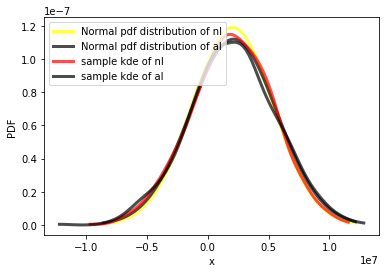

In [27]:
thinkplot.Pdf(pdf_nl, label='Normal pdf distribution of nl', color='yellow')
thinkplot.Pdf(pdf_al, label='Normal pdf distribution of al', color='black')
ball = np.random.normal(mean_of_NL, std_of_NL, 1000)
ball2 = np.random.normal(mean_of_AL, std_of_AL, 1000)

ball_pdf_nl = thinkstats2.EstimatedPdf(ball)
ball_pdf_al = thinkstats2.EstimatedPdf(ball2)

thinkplot.Pdf(ball_pdf_nl, label='sample kde of nl', color='red')
thinkplot.Pdf(ball_pdf_al, label='sample kde of al', color='black')

thinkplot.Show(xlabel='x', ylabel='PDF', loc='upper left')



In [29]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

0.044


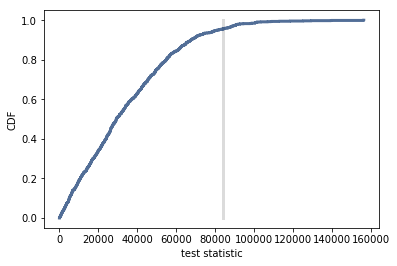

In [31]:
data = NL.values, AL.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print (pvalue)
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [41]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

NL_sample = SampleRows(NL, 12959)

In [42]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
print('Covariance is', (Cov(NL_sample,AL)))
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

print('Correlation is',Corr(NL_sample,AL)*100)

Covariance is -77251650335.4
Correlation is -0.646192673866


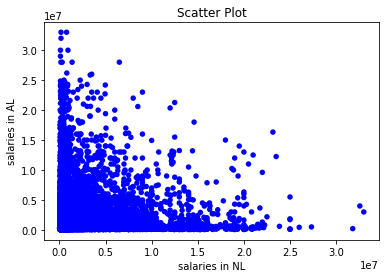

In [47]:
thinkplot.Scatter(NL_sample, AL, alpha=1)
thinkplot.Config(xlabel='salaries in NL',
                 ylabel='salaries in AL',
                 title="Scatter Plot",
                 legend=False)